In [ ]:
"""
Getting accustomed with MPC - SOLUTION
author: Vasken Dermardiros
date: 2019-05-12
Confidential. For internal use only.

This is /a/ solution and not /the/ solution. Many approaches can be taken and should. 
A model is like an opinion, the more you get, the better, except that opinions of some
are more educated than others.

"""

# Mise en Situation
An advanced alien civilization has landed on the blue pebble in the vastness of space we call Earth, which literaly means dirt, and we, scientists, have presented them a token of humble peace: a net-zero energy building!

Alas, EnergyPlus got a new update that made the model of the building completely unuseable. Years of work, wasted. A moment of silence please. Let us grieve.

But hoorah! A young engineer, full of hope and full of intelimaginences exclaims, "why the sad faces my utterly depressed PhD friends?" The PhD students who worked tiredlessly replied, "we have spent an eternity measuring the thermal conductance of the tile floors in this building to have the most accurate model ever, my research compatriot there has even proclaimed his love of the building by marrying it in holy matrimony, but with the recent update to version 9.0 and the introduction of JDF formating, the IDF file no longer loads and we can no longer use the predictions to optimize or quasi-heuristico-polonialy optimize the building." #sad

"My friends, I have no idea what the hell any of that means," asserted the young engineer, "but have you not been monitoring this institution?" "But indeed we have," replied the researcher befuddled, "do you really think we are here doing Mickey Mouse stuff?," slightly in annoyance. "I do not wish to strain your delicate pysche, I merely believe you can do away with the complex modeling and use a simplified low-order approximation, like an RC model, but I will need some help with fitting the parameters."

This is where you come in! Help the engineer fit an RC model to then present it to the aliens. Did you forget the aliens? Is there anybody out there? Just nod if you can hear me, is there anyone home?

In [2]:
# Make jupyter notebook full-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Default packages
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta

In [4]:
# Save and display settings
mpl.rc('figure', figsize=(4, 4))
# mpl.rcParams.update({'figure.subplot.left': 0.20, 'figure.subplot.bottom': 0.15})
mpl.rcParams.update({'figure.subplot.left': 0.15, 'figure.subplot.bottom': 0.11})
# figext, figdpi = ".svg", 600
figext, figdpi = ".png", 300
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
RED, BLUE, PINK = "#f80d1c", "#00bdff", "#fb3983"

np.set_printoptions(edgeitems=30, linewidth=100000,)
#     formatter=dict(float=lambda x: "%.3g" % x))
np.set_printoptions(suppress=True) # suppress scientific notation

# Exploratory Data Analysis
After importing all the necessary packages, we will begin by reading the csv file with the data and doing some exploratory data analysis (pretty much making graphs and looking at them).

In [5]:
# Load data from csv file using pandas
df = pd.read_csv('intro_data.csv', parse_dates=True, infer_datetime_format=True, index_col=0)

In [6]:
# So what's in the dataframe?
df.head() # print the first few rows

,T_ext,T_int,heating_total,cooling_total,cons,prod,GHI
Datetime,,,,,,,
2018-01-01 00:00:00,-21.8566,18.4578,38.025668,0.0,11.24672,0.0,0.0
2018-01-01 00:15:00,-21.8434,18.4086,26.322083,0.0,13.07532,0.0,0.0
2018-01-01 00:30:00,-21.9561,18.3142,13.017722,0.0,16.32664,0.0,0.0
2018-01-01 00:45:00,-22.0408,18.2528,10.618306,0.0,15.91600,0.0,0.0
2018-01-01 01:00:00,-22.1299,18.1697,10.781639,0.0,17.24240,0.0,0.0


In [9]:
# [EXERCISE] Check if there is missing or corrupt data
df.isnull().sum()

T_ext            0
T_int            0
heating_total    0
cooling_total    0
cons             0
prod             0
GHI              0
dtype: int64

In [10]:
# Some statistics perhaps?
df.describe()

,T_ext,T_int,heating_total,cooling_total,cons,prod,GHI
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,-6.907507,20.534089,34.706282,-0.167073,21.694931,6.848224,78.752442
std,7.374684,1.028797,28.997807,1.103099,8.368921,16.752882,139.378011
min,-24.472000,17.597100,0.000000,-12.137961,6.040000,0.000000,0.000000
25%,-11.998650,19.883875,8.312156,0.000000,13.720000,0.000000,0.000000
50%,-6.533935,20.606300,24.246883,0.000000,21.980000,0.000000,0.000000
75%,-0.878344,21.312775,55.121886,0.000000,28.804000,2.850000,103.229167
max,8.879740,23.207500,110.490381,0.000000,44.120000,93.640000,685.400000


In [ ]:
# Plot the data!
# df.plot()
# plt.show()

# ... actually don't because there's too much of it, what about something a little more useful?

In [ ]:
# Like seeing what are correlations between the data using seaborn + the distribution of the data in the diagonal
# Read through the documentations to learn all the options
sns.pairplot(df, diag_kind="kde", kind='reg', plot_kws={'line_kws':{'color':RED}, 'scatter_kws': {'color':BLUE,'s':1,'alpha': 0.1}})
plt.show()

So the previous plot shows what exactly? How one variable is related to another for that time. Could you think of a way to do this with lagged values? What would you be trying to learn from that?

Back to the previous plots, the red lines are best-fit regression lines, do you agree with them?

On the diagonal, we see the density of the parameters. Look at GHI, it appears it's mostly 0 most of the time, why? Consumption has 2 bumps. Heating Total has a few bumps, what do you think those represent?

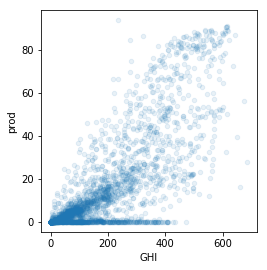

GHI vs Production: at some times, GHI is positive while prod is negative. Malfunctioning system?


In [16]:
# [EXERCISE] Do a scatter plot of production versus GHI and fit a trendline; what can you observe?
df.plot.scatter(x='GHI', y='prod', alpha=0.1)
plt.show()
print("GHI vs Production: at some times, GHI is positive while prod is negative. Malfunctioning system?")

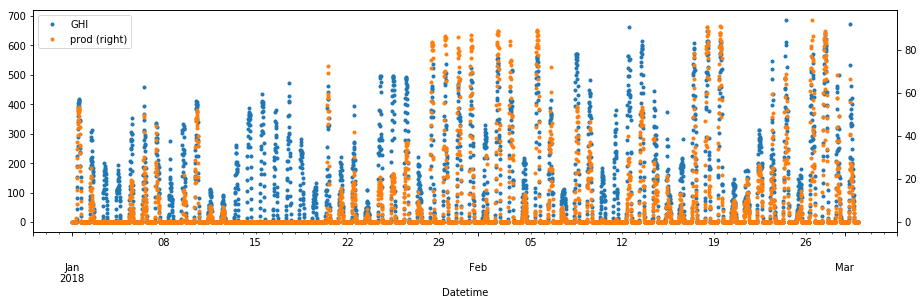

In [45]:
# Let's see when this is happening.
# plot them; GHI on left axis (W/m^2), production on the right (kW)
df[['GHI','prod']].plot(figsize=(16,4), secondary_y='prod', marker='.', linestyle='')
plt.show()

I see cases where GHI is quite high and production is zero: jan 3, jan 4, mid january, feb 10, feb 11 if I didn't miss any other day. But visual inspection isn't always doable. Let's filter the data to isolate these cases.

In [59]:
# It's safe to assume that production is proportional to how much sun we have outside, let's calculate the ratio
df['prod_GHI_ratio'] = df['prod']/df['GHI']
# Let's filter the data to have the times when GHI is large enough so that there's at least some production
daytime = df[['GHI','prod','prod_GHI_ratio']][df['GHI'] > 100.]
daytime['prod_GHI_ratio'].describe()

count    1471.000000
mean        0.080496
std         0.063911
min         0.000000
25%         0.033075
50%         0.070877
75%         0.122817
max         0.399403
Name: prod_GHI_ratio, dtype: float64

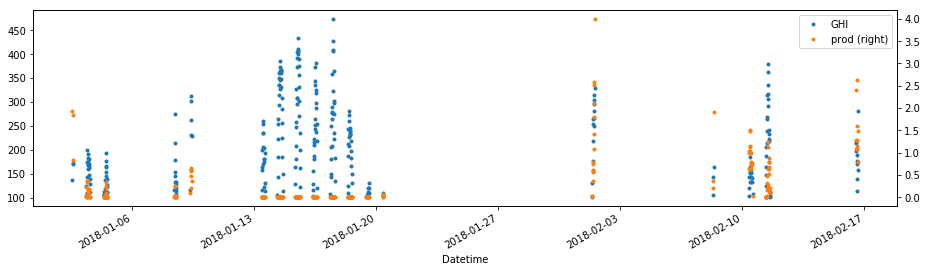

Malfunctioning days (even if it was for a single 15-minute instance):
['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-08' '2018-01-09' '2018-01-13' '2018-01-14' '2018-01-15' '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20' '2018-02-01' '2018-02-08' '2018-02-10' '2018-02-11' '2018-02-16']


In [61]:
# Finally, select the cases where (prod/GHI) is below it's 20th percentile (modify this)
malfunctioning_production = daytime[daytime['prod_GHI_ratio'] < daytime['prod_GHI_ratio'].quantile(q=0.20)]
malfunctioning_production_days = np.unique(malfunctioning_production.index.strftime('%Y-%m-%d').values)

malfunctioning_production[['GHI','prod']].plot(figsize=(16,4), secondary_y='prod', marker='.', linestyle='')
plt.show()

print('Malfunctioning days (even if it was for a single 15-minute instance):')
print(malfunctioning_production_days)

So we found a bunch of days where the inverters did not produce as much as they should (based on the data). You can refine this part to instead of using a conditional of there being only one instance of the ratio being below the threshold to have a count of when it fails, and only signal it being erratic if there are more than a certain number of occurences in a day or following days.

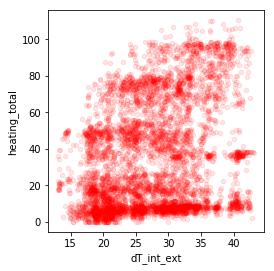

In [64]:
# Another interesting correlation would be to plot the heating demand as a function of the inside/outside temperature difference
df['dT_int_ext'] = df['T_int'] - df['T_ext']
df.plot.scatter(x='dT_int_ext', y='heating_total', alpha=0.1, color='r')
plt.show()

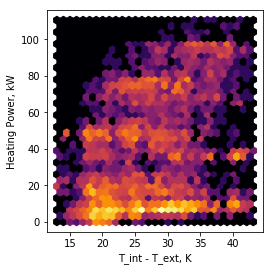

In [71]:
# Not very clear to see the trends, let's try another approach where we can bin the points
# I'm also scaling this logarithmically since the system is off most of the time
plt.hexbin(x=df['dT_int_ext'], y=df['heating_total'], gridsize=30, bins='log', cmap='inferno')
plt.xlabel('T_int - T_ext, K')
plt.ylabel('Heating Power, kW')
plt.show()

Observations:
+ We see the system being off most of the time: heating power ~ 0kW
+ There seems to be a  few horizontal line trends with gaps between them and it is representative of the heat pump operation: the heat pumps are either on/off or have stages; multiple heat pumps with stages results in many steps in the system level
+ We could image a linear trendline where heating power is proportional to dT, but it's not obvious
+ Maybe there are other factors influencing this behaviour? You could filter this into occupied/unoccupied times and see if the trend changes; what if you colour a scatter plot points based on GHI that can represent solar gains?

# Train an RC Model
Draw a 1-R 1-C model of this building. Which variables go where? Heating Total and Cooling Total is in kW (average for that timestep), Consumption and Production are electrical and in kWh, GHI is global horizontal irradiance in W/m^2.

In [ ]:
# [EXERCISE] Draw RC model on paper, write down the equation (1) here in the form:
# T_int^{t+1} = b_0*T_int^{t} + b_1*T_ext^{t} + ...
# where you replace b_0 with what they correspond to, like U/dt
# use conductance (U=1/R) instead of resistance to avoid dividing by 0 (if it happens)



Before finding the best parameters for the data, it is good practice to split the data into a training and a testing set. The training set is what the model learns on, the testing set is what we use to observe it's performance on an out-of-sample situation.

In [ ]:
df['T_int_plusone'] = df['T_int'].shift(-1) # search on google "pandas shift"

In [ ]:
# Split data to train/test sets
df_train = df['2018-01-01':'2018-02-14'].copy()
df_test = df['2018-02-14':'2018-02-28'].copy()
df_test.interpolate(method='linear', inplace=True)

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# [EXERCISE] Complete this to match your equation
# Inputs used in model
X_columns = ['T_int','T_ext',...]
# Output
y_column = ['T_int_plusone']

In [ ]:
# [EXERCISE] Transfer the equation you wrote from above here where X is a matrix containing the training data
dt = 15*60. # s
def model(X,a,b,c,d,e,f...): # returns T_int{t+1}
    return a*X[0,] + b*X[1,] + ... # you will copy this equation in the MPC part

In [ ]:
# [EXERCISE] Fit your model using the training set!
X_data_curvefit = df_train[X_columns].values.T
y_data_curvefit = df_train[y_column].values.flatten()

# Read the documentation for "curve_fit" and use it to fit your model coefficients to the data
# The function returns the fitted parameters and the covariance
popt, pcov = curve_fit(model, X_data_curvefit, y_data_curvefit)
a,b,c,d,e,f... = popt # <-- update!
perr = np.sqrt(np.diag(pcov)) # covariance matrix diagonal is the variance
print(popt, perr)

In [ ]:
# Make predictions!
y_pred = model(df_test[X_columns].values.T, popt[0], popt[1], popt[2], popt[3], ...) # <-- update!
y_test = df_test[y_column].values.flatten()

In [ ]:
# You can change the start and end of the plot
# I prefer using Bokeh since you can interact with the plot
start, end = 0, 200
y_test_plot = y_test[start:end]
y_pred_plot = y_pred[start:end]

plt.subplot(121)
plt.plot(y_test_plot, color='k', label='Truth')
plt.plot(y_pred_plot, color=PINK, label='Predicted')
plt.legend(frameon=False)

plt.subplot(122)
plt.plot(y_test_plot-y_pred_plot, label='Residual')
plt.legend(frameon=False)

plt.tight_layout()
plt.show()

#### Augmented Dickey-Fuller test to see if residuals are stationary

In [ ]:
import statsmodels.api as sm

In [ ]:
residuals = y_test - y_pred

In [ ]:
adf = sm.tsa.stattools.adfuller(residuals)
print('if p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')
print('ADF Statistic: %f for y_%i, p-value: %f' %(adf[0], 1, adf[1]))

#### Durbin-Watson test to capture autocorrelation in residuals

In [ ]:
dw = sm.stats.stattools.durbin_watson(residuals)
# The Durbin Watson statistic is a number that tests for autocorrelation in the 
# residuals from a statistical regression analysis. The Durbin-Watson statistic 
# is always between 0 and 4. A value of 2 means that there is no autocorrelation 
# in the sample. Values from 0 to less than 2 indicate positive autocorrelation 
# and values from more than 2 to 4 indicate negative autocorrelation.
print(dw)

In [ ]:
# [EXERCISE] What's all that about?



In [ ]:
# [EXERCISE] Create a linear model for the electrical production using GHI; what would be a better approach?
# Pretend you had also readings for diffuse horizontal irradiance (DHI) and direct normal irradiance (DNI)
# and you know the number of panels at what orientation and tilt



# Optimization
Read Boyd's book on convex optimization. I won't be going anywhere. Take your time. https://web.stanford.edu/~boyd/cvxbook/

Done? Good! I'm a big fan of cvxpy and that's what we will be using. Scipy isn't great here. Do your own bloody research.

CVXPY examples ('Control' example is MPC): https://www.cvxpy.org/examples/index.html

You probably didn't read the whole book or followed his online course *because you are lazy and want to be spoon-fed everything.*

In a nutshell, convex optimization is a special type of optimization where the cost function and all constraints are convex. Everything being convex has a very nice property that when you find an optimal, it is *the* optimal. Period. What's convex? if the 2nd-derivative of the function or contraints is non-negative. Linear programming is a simpler case of convex optimization. Generally, convex optimization can be performed extremely fast for the number of variables we tend to have in our field. You can solve for a 24h prediction horizon with a 15 minute time step in <<1 second. (The actual optimization takes milli-seconds, most of the time is spent translating the optimization problem to the form needed by the actual solver.)

Linear functions are convex. Quadratic functions are convex. Log is convex. Adding two convex functions is convex. Multiplying two convex functions is convex. Anyway. Do your research and really understand this. There are cases where your function is not convex but can be approximated convex.

In [ ]:
import time
import cvxpy as cp
print(cp.__version__) # make sure it's >1.0
print(cp.installed_solvers()) # which solvers are available; you can also use commercial solvers if you have a license key

## MPC Example from CVXPY

You may wish to look at the other examples from the website, but let's focus here on the MPC example because we will do something similar with the model we trained.

In [ ]:
# [EXERCISE] Replicate the 'control' example from the cvxpy website:
# https://colab.research.google.com/github/cvxgrp/cvx_short_course/blob/master/intro/control.ipynb




In [ ]:
# [EXERCISE] Change the sum of squares cost to a norm-1, how does the behaviour of the system change? What is norm-1 penalizing?




In [ ]:
# [EXERCISE] Keep the sum of squares cost. Add a constraint to reduce variable "u" from changing more than a
# certain amount from one timestep to the next, eg. |u^{t+1} - u^{t}| <= some value
# What happens?




## MPC Using Physics-Based Approach, 1st-order model

I hope it's safe to assume that you included heating_total in your model and this is what we will control. Cooling_total is practically 0 for the whole dataset.

Traditionally, the variable 'x' represents the system variables (temperature, pressure) which are properties that are measured. The variable 'u' represents controllable variables (heater output, fan state, valve position) and is what MPC will change to attempt to minimize the cost function.

Everything has to be expressed in the cost function and constraints. The MPC doesn't know a battery can't have a -24% charge level, you will need to constrain it.

In [ ]:
# Pick the day from where to test it on
df_opti = df_test['2018-02-20'::]

In [ ]:
# [EXERCISE] Modify my MPC code to include your calibrated model
nx = len(X_columns)-1 # dynamics variables: 'T_ext', 'T_int', ...
nu = 1    # controllable variables: 'heating_total'
st = 4    # steps per hour
ph = 24*st # 1 day
ct = 1    # time step where to start optimization {>0}

# For simplicity, I have these here like this; it's easier to have these within the df_test dataframe
heating_min, heating_max = 0., 90. # u0_min, u0_max
Tint_min, Tint_max = 18.*np.ones(ph), 26.*np.ones(ph)
Tint_min[9*st:21*st] = 20.

x = cp.Variable((nx, ph))
u = cp.Variable((nu, ph))
c = np.ones((nu, ph)) # unit cost
# b = cp.Parameter(nx+nu)

obj = cp.Minimize(c*u.T) # vectorized form

constraints = cons = []
cons.append(x[???,:] >= Tint_min,) # replace ??? with the index corresponding to T_int in your X_columns variable
cons.append(x[???,:] <= Tint_max,) # replace ??? with the index corresponding to T_int in your X_columns variable
cons.append(u >= heating_min,)
cons.append(u <= heating_max,)

cons.append(x[???,:] == df_opti['T_ext'][ct:ct+ph],) # replace ??? with the index corresponding to T_ext in your X_columns variable, if you used it
cons.append(x[???,:] == df_opti['GHI'][ct:ct+ph],) # replace ??? with the index corresponding to GHI in your X_columns variable, if you used it
cons.append(x[???,:] == df_opti[???][ct:ct+ph],) # other; you can make your own too; internal gains ?= cons - heating_total/COP, up to you
T_int_0 = df_opti['T_int'][ct-1] # initial temperature

# NOTE: x[1,t] is actually @ t=t+1 meaning at the next step, 
# otherwise we need to calculate Q_ph+1 which is useless
# TODO: change the following section to match your calibrated equation format
cons.append(x[1,0] == b[0]*u[0,0] + b[1]*x[0,0] + b[2]*T_int_0 + b[3]*x[2,0] + b[4]*x[3,0],)
for t in range(1,ph):
    cons.append(x[1,t] == b[0]*u[0,t] + b[1]*x[0,t] + b[2]*x[1,t-1] + b[3]*x[2,t] + b[4]*x[3,t],)
constraints.extend(cons)

prob = cp.Problem(obj, constraints)

timer = time.time()
# b.value = b_grey # grey-box corresponding parameter values
prob.solve(verbose=True, solver=cp.ECOS)
Tint_MPC = x.value[???,:] # replace ??? with the index corresponding to T_int in your X_columns variable
Q_MPC = u.value[0,:]
print("Elapsed time: %.5f seconds" % (time.time()-timer))

In [ ]:
tickhrs = 3
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(Tint_min,'--', c=RED, label='Heating SP')
plt.plot(Tint_max,'--',c=BLUE, label='Cooling SP')
plt.plot(df_opti['T_int'][ct:ct+ph].values,'k--', label='Interior, Current')
plt.plot(Tint_MPC,'k', label='Interior, MPC')

plt.xlim([0,ph])
ax.set_xticks(np.arange(0,ph+1,4*tickhrs))
ax.set_xticklabels(np.arange(0,24+1,tickhrs))
ax.set_yticks(np.arange(18,27,2))
# plt.legend(['Heating SP','Cooling SP'], loc='upper left')
plt.legend(loc='upper left')
plt.xlabel('Time, h')
plt.ylabel('Temperature, degC')
# plt.title('Setpoint Temperatures')
plt.grid()
plt.savefig('figures/MPC_better_than_normal'+figext, dpi=figdpi)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(df_opti['heating_total'][ct:ct+ph].values,'k--', label='Heating, Current')
plt.plot(Q_MPC,'k', label='Heating, MPC')

plt.xlim([0,ph])
ax.set_xticks(np.arange(0,ph+1,4*tickhrs))
ax.set_xticklabels(np.arange(0,24+1,tickhrs))
ax.set_ylim([0,None])
plt.legend(loc='upper right')
plt.xlabel('Time, h')
plt.ylabel('Heating, kW')
# plt.title('Setpoint Temperatures')
plt.grid()
plt.savefig('figures/MPC_better_than_normal_Q'+figext, dpi=figdpi)
plt.show()

print("Energy consumed by current strategy: %.0f kWh" % (15/60*df_opti['heating_total'][ct:ct+ph].sum()))
print("Energy consumed by MPC strategy: %.0f kWh" % (15/60*Q_MPC.sum()))

## Follow Up

Congrats! You just did 1 step of MPC for a 24h prediction horizon! What you would actually do from here is to apply the first action and 15 minutes later, run the optimization again and apply the first action then too. You could use a "warm start" approach in the optimization and use the previous optimal results as the initial guess to speed conversion. You could also use the parameter approach like where I have variable 'b' be weights that I can chose and run the optimization multiple times (same 24 hour period) and have the 'b' weights vary a little.

Limitations
+ T_ext, GHI, consumption, production are given for future timesteps with perfect certainty
+ MPC may decide to apply actions that have never happened and the model's response might be far from reality
+ I'm too sleepy to think of others

In [ ]:
# [EXERCISE] Change the sum of energy cost to penalize the peak power, how does the behaviour of the system change?



In [ ]:
# [EXERCISE] Change the sum of energy cost to have varying cost at different times, how does the behaviour of the system change?



In [ ]:
# [EXERCISE] Change the sum of energy cost to replicate Hydro-Quebec Rate M, how does the behaviour of the system change?



In [ ]:
# [EXERCISE] Did you include the electrical consumption of the building? Did you make sure you're not double counting the HVAC system?



In [ ]:
# [EXERCISE] Change the sum of energy cost to replicate Hydro-Quebec Rate G, how does the behaviour of the system change?



In [ ]:
# [EXERCISE] Change the sum of energy cost to minimize grid interaction. Include the consumption and production 
# (was the production fault free?)



In [ ]:
# [EXERCISE] Change the start date and increase the prediction horizon to 2 days to have a sunny day followed by a cloudy day during the week



In [ ]:
# [EXERCISE] Add in an ideal battery (fix a max kWh charge level and a max kW power output) and minimize grid interaction
# How is the battery being used? [use the sunny day then cloudy day period]
# Vary the initial state of charge.



If you did all this and you feel confident about yourself then tap yourself on the shoulder because you are now initiated! As a future project, you may consider having a more detailed RC model, using an ARX model, using PCM as a storage solution, using Canmeteo predictions, adding noise to T_ext to make it more realistic, adapting the fitted RC model parameters at every timestep (fixed when running predictions). The world is now yours my young padawans. May the force be with you.

.  
.  
...  
DUN DUN DUN DUNNN DUNNNNNNNNNNN DUN DUN DUN DUNNNNNNNNNNN DUN  
DUN DUN DUN DUNNNNNNNNNNNN DUN  
DUN DUN DUN DUNNNNNNN  
D.DUN DUNNNNNNNNN DUN DUN DUN DUNNNNNNNNNNNN DUN  
DUN DUN DUN DUNNNNNNNNN DUN  
DUN DUN DUN DUNNNNNNNN  
Dididoooooooo do do do do dididoo didoodoo  
dooooooo do do do do DOO DIDOODOO  
do do dooooooo doo doo didoodoo didoodoo  
DUN DUNDUN DUNDUN DUNDUN DUNDUN DUNDUNNNNNNNNNNNNNNNNNNNNNN  
DUNDIDIDUN DUNDIDIDUNNNNNNN DUN DUN DUN